In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


In [3]:
from pandas.io.data import DataReader

C:\Users\anupr\Anaconda2\lib\site-packages\pandas\io\data.py:33: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [4]:
from datetime import datetime

In [5]:
from __future__ import division

In [6]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [7]:
end = datetime.now()

start = datetime(end.year-1,end.month,end.day)

In [8]:
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [9]:
AAPL.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-03-02,129.250000,130.279999,128.300003,129.089996,48096700,126.740569
2015-03-03,128.960007,129.520004,128.089996,129.360001,37816300,127.005659
2015-03-04,129.100006,129.559998,128.320007,128.539993,31666300,126.200576
2015-03-05,128.580002,128.750000,125.760002,126.410004,56517100,124.109352
2015-03-06,128.399994,129.369995,126.260002,126.599998,72842100,124.295889


In [10]:
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,254.000000,254.000000,254.000000,254.000000,2.540000e+02,254.000000
mean,116.823071,117.901732,115.524410,116.694488,5.032469e+07,115.408759
std,11.077163,10.889159,11.198661,10.994817,2.056128e+07,10.375864
min,93.129997,94.500000,92.000000,93.419998,1.304640e+07,92.915814
25%,110.672499,111.884998,109.084999,110.372501,3.625808e+07,109.308920
50%,117.579998,119.020000,116.430001,117.919998,4.606450e+07,117.144345
75%,126.425001,127.277500,125.610003,126.432503,5.623620e+07,124.286071
max,134.460007,134.539993,131.399994,132.649994,1.622063e+08,130.671320


In [11]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2015-03-02 to 2016-03-02
Data columns (total 6 columns):
Open         254 non-null float64
High         254 non-null float64
Low          254 non-null float64
Close        254 non-null float64
Volume       254 non-null int64
Adj Close    254 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.9 KB


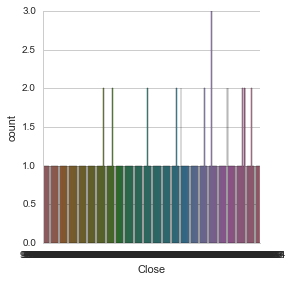

In [12]:
sns.factorplot('Close',data=AAPL,kind='count')

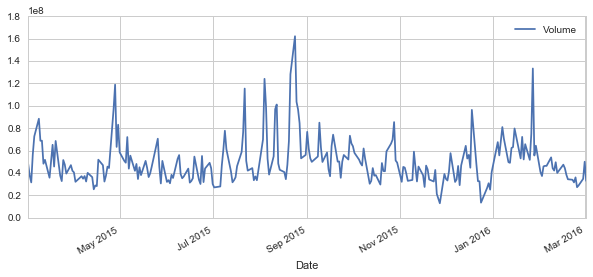

In [13]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

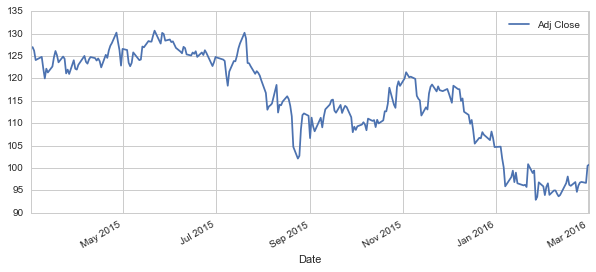

In [14]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

In [15]:
# now let's calculate moving average of the stock

In [16]:
AAPL.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-03-02,129.250000,130.279999,128.300003,129.089996,48096700,126.740569
2015-03-03,128.960007,129.520004,128.089996,129.360001,37816300,127.005659
2015-03-04,129.100006,129.559998,128.320007,128.539993,31666300,126.200576
2015-03-05,128.580002,128.750000,125.760002,126.410004,56517100,124.109352
2015-03-06,128.399994,129.369995,126.260002,126.599998,72842100,124.295889


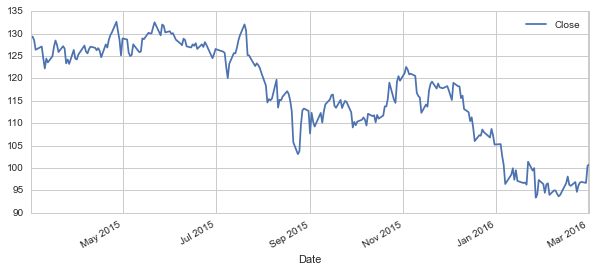

In [17]:
AAPL['Close'].plot(legend=True,figsize=(10,4))

In [18]:
ma_day = [10,20,30]

In [19]:
for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = pd.rolling_mean(AAPL['Adj Close'],ma)

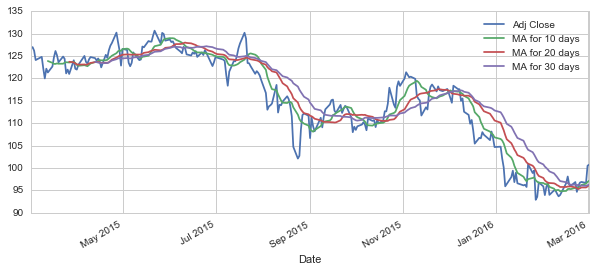

In [20]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 30 days']].plot(subplots=False,figsize=(10,4))

In [21]:
AAPL['Daily Returns'] = AAPL['Adj Close'].pct_change()

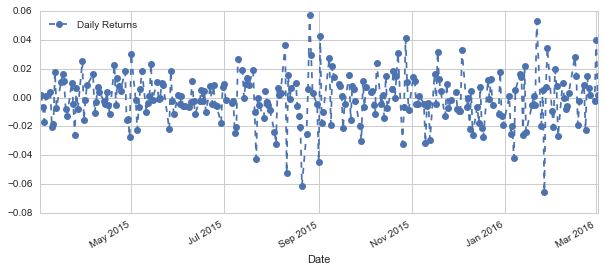

In [22]:
AAPL['Daily Returns'].plot(figsize=(10,4),legend=True,marker='o',linestyle='--')

In [25]:
closing_df = DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [26]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-03-02,126.740569,385.660004,571.342601,42.714399
2015-03-03,127.005659,384.609985,573.642610,42.130335
2015-03-04,126.200576,382.720001,573.372583,41.916181
2015-03-05,124.109352,387.829987,575.332609,41.964852
2015-03-06,124.295889,380.089996,567.687558,41.234775


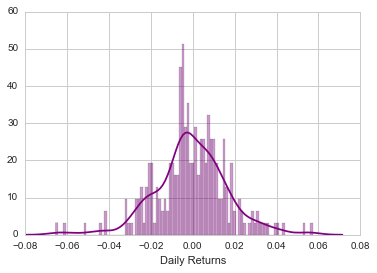

In [28]:
sns.distplot(AAPL['Daily Returns'].dropna(),bins=100,color='purple')

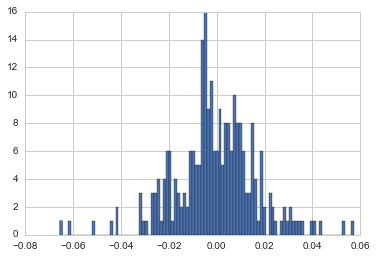

In [30]:
AAPL['Daily Returns'].hist(bins=100)

In [31]:
tech_rets = closing_df.pct_change()

In [32]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,0.002092,-0.002723,0.004026,-0.013674
2015-03-04,-0.006339,-0.004914,-0.000471,-0.005083
2015-03-05,-0.016571,0.013352,0.003418,0.001161
2015-03-06,0.001503,-0.019957,-0.013288,-0.017397


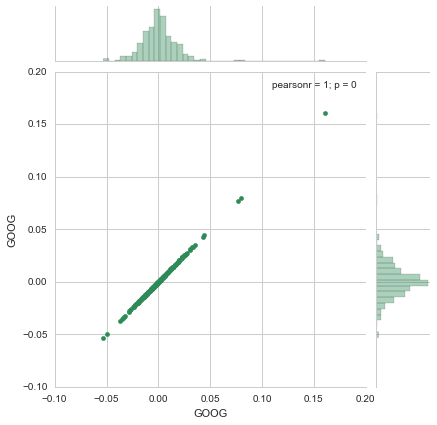

In [34]:
sns.jointplot('GOOG','GOOG',tech_rets,kind = 'scatter',color='seagreen')

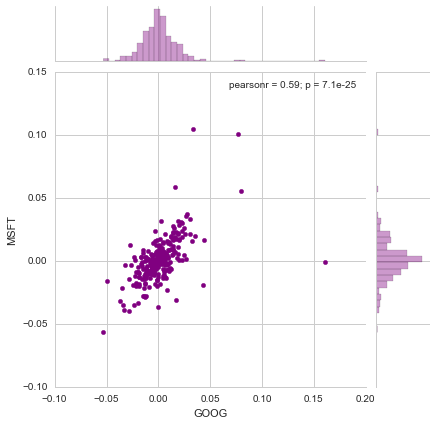

In [36]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter',color='purple')